# Default of Credit Card Clients

**Dataset Information**

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.
https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset

# Analytical Test

I will start by importing the libraries needed first for reading and displaying data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

The data is loaded and stored in the dataframe df, and with the info() function I will have a first impression of the variables.

In [2]:
df = pd.read_csv('default_dataset.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,8920,50000,1,1,2,23,2,3,2,0,...,8687,9048,9306,0,1000,810,500,408,500,1
1,8926,20000,1,3,1,51,0,0,0,0,...,18905,19462,18967,1266,1270,2800,1000,0,512,1
2,8930,10000,1,2,2,29,2,2,2,2,...,9089,8658,8372,2600,600,895,0,0,764,1
3,8933,240000,2,2,2,42,1,2,2,0,...,166813,170739,174532,6700,0,6900,6000,6000,6000,1
4,8938,170000,2,1,2,30,2,0,0,0,...,30183,31041,31871,2000,2000,1233,1500,1500,2000,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27999 entries, 0 to 27998
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         27999 non-null  int64
 1   LIMIT_BAL  27999 non-null  int64
 2   SEX        27999 non-null  int64
 3   EDUCATION  27999 non-null  int64
 4   MARRIAGE   27999 non-null  int64
 5   AGE        27999 non-null  int64
 6   PAY_0      27999 non-null  int64
 7   PAY_2      27999 non-null  int64
 8   PAY_3      27999 non-null  int64
 9   PAY_4      27999 non-null  int64
 10  PAY_5      27999 non-null  int64
 11  PAY_6      27999 non-null  int64
 12  BILL_AMT1  27999 non-null  int64
 13  BILL_AMT2  27999 non-null  int64
 14  BILL_AMT3  27999 non-null  int64
 15  BILL_AMT4  27999 non-null  int64
 16  BILL_AMT5  27999 non-null  int64
 17  BILL_AMT6  27999 non-null  int64
 18  PAY_AMT1   27999 non-null  int64
 19  PAY_AMT2   27999 non-null  int64
 20  PAY_AMT3   27999 non-null  int64
 21  PAY_AMT4   2

In [4]:
duplicados = df[df.duplicated(keep='first')]
duplicados

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default


It can be identified that the data frame is composed of 25 columns and 27999 rows.
Within these 25 characteristics there are continuous variables (payments, account status) and categorical variables (gender, education). However, one advantage is that the categorical ones are already detailed in numerical form (int64). In itself, the variable 'ID' is not a data that could contribute to the model so I would not consider it for the analysis. I may also note that no null variables are present in any of the rows.

**First Analysis**: since the objective is to develop a model to calculate the probability of non-payment of a customer as shown in the 'default' column, the model to be developed is of the Binary Classification type (yes=1,no=0). My hypothesis would be based on giving priority or weight to the probability of predicting customers with default (1) or non-payment, since this is the component that is giving losses to the bank.

## Data visualization

In [5]:
data =df.copy()

   default  value_counts
0        0         23362
1        1          4637


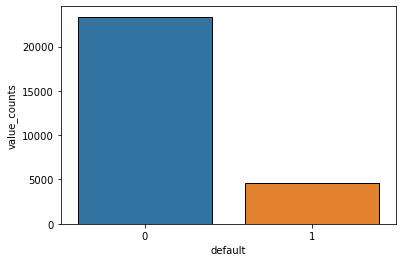

In [6]:
default_count = df['default'].value_counts().to_frame().reset_index()
default_count.rename(columns={'default': 'value_counts','index':'default'}, inplace=True)
sns.barplot(x='default',y='value_counts',edgecolor="black", data=default_count)
print(default_count)

The data frame has data mostly classified as default = 0. Practically 83% of the data falls into the default = 0 category and 17% into the default = 1 category. This could be a complicity for the model since it could be considered that the data is not balanced.

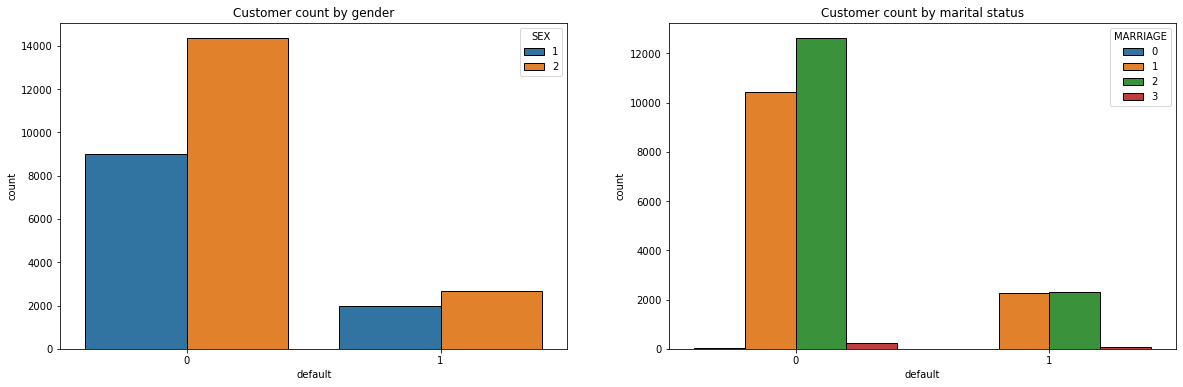

In [7]:
fig = plt.figure(figsize=(20, 6)) 
ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2) 
# Subplot 1
sns.countplot(x='default', hue='SEX',edgecolor="black",data=df, ax =ax0)
ax0.set_title('Customer count by gender')
# Subplot 2
sns.countplot(x='default', hue='MARRIAGE',edgecolor="black",data=df, ax =ax1)
ax1.set_title ('Customer count by marital status')

plt.show()

Let's look at the correlation of the data.

<AxesSubplot:>

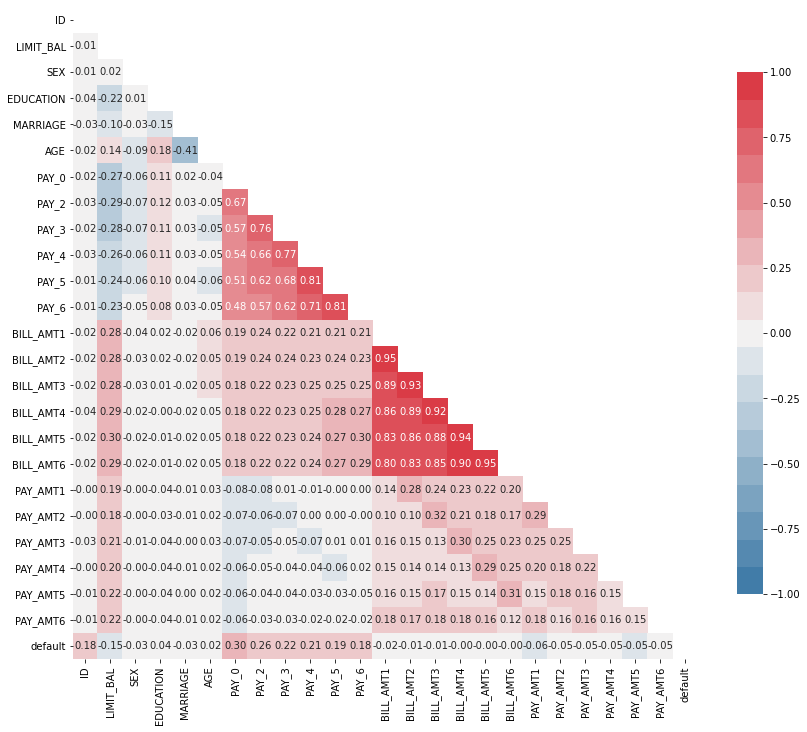

In [8]:
df_corr = df.corr()
fig, ax = plt.subplots(figsize=(14, 12))
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
sns.heatmap(df_corr, mask = mask, annot = True, fmt = ".2f", cmap = sns.diverging_palette(240, 10, n=19),
           vmin = -1, vmax = 1, cbar_kws = {"shrink": .8})

The continuous variables of BILL_AMT(1-6) present a very strong correlation, which could present a slight multicollinearity condition for the model and consumption time. In the variable selection process I might not consider these characteristics for the model, later I can confirm it with the ANOVA filtering method.

In [9]:
df0 = df[df['default']==0]
df1 = df[df['default']==1]

I divided the data into two dataframes. df0 corresponds to data with default= 0 and df1 corresponds to data with default=1.

Let's see a statistical description of the variables.

In [10]:
print(df1.shape)
df1.describe()

(4637, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,4637.000000,4637.000000,4637.000000,4637.000000,4637.000000,4637.000000,4637.000000,4637.000000,4637.000000,4637.000000,...,4637.000000,4637.000000,4637.000000,4637.000000,4637.000000,4637.000000,4637.000000,4637.000000,4637.000000,4637.0
mean,19203.921285,127068.725469,1.573862,1.917619,1.521458,35.826828,0.681691,0.498598,0.374164,0.294156,...,42948.854863,39901.324132,38703.767953,3385.896053,3425.367048,3521.899720,3192.415786,3015.160233,3443.257494,1.0
std,6094.025384,113817.905672,0.494568,0.731772,0.526091,9.607010,1.385723,1.490207,1.474241,1.521827,...,65651.134909,62491.183999,60408.243983,9362.508055,11636.228937,13883.910561,11963.880071,10643.971671,13054.567795,0.0
min,8920.000000,10000.000000,1.000000,1.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-65167.000000,-53007.000000,-94625.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,14063.000000,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,0.000000,-1.000000,...,2393.000000,1745.000000,1324.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,18731.000000,90000.000000,2.000000,2.000000,2.000000,34.000000,1.000000,0.000000,0.000000,0.000000,...,19431.000000,18721.000000,18151.000000,1600.000000,1600.000000,1331.000000,1000.000000,1000.000000,1000.000000,1.0
75%,24526.000000,190000.000000,2.000000,2.000000,2.000000,42.000000,2.000000,2.000000,2.000000,2.000000,...,51060.000000,47891.000000,47519.000000,3500.000000,3400.000000,3000.000000,2900.000000,3000.000000,3000.000000,1.0
max,30000.000000,740000.000000,2.000000,6.000000,3.000000,75.000000,8.000000,7.000000,8.000000,7.000000,...,548020.000000,547880.000000,514975.000000,244500.000000,358689.000000,508229.000000,432130.000000,330982.000000,287982.000000,1.0


In [11]:
print(df0.shape)
df0.describe()

(23362, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,23362.000000,23362.000000,23362.000000,23362.000000,23362.000000,23362.000000,23362.000000,23362.000000,23362.000000,23362.000000,...,23362.000000,23362.000000,23362.000000,23362.000000,2.336200e+04,23362.000000,23362.000000,23362.000000,23362.000000,23362.0
mean,15063.615701,178099.135348,1.614203,1.841238,1.558642,35.416788,-0.211198,-0.301901,-0.316240,-0.355620,...,43610.747453,40532.355877,39044.927061,6307.434851,6.640027e+03,5753.390078,5300.847145,5248.455569,5719.818594,0.0
std,8683.824834,131633.580228,0.486794,0.806743,0.520796,9.077577,0.952490,1.035223,1.048411,1.013194,...,64326.495407,60619.391368,59548.825568,18015.250656,2.530319e+04,18685.043022,16690.451662,16072.319052,18793.692291,0.0
min,3.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0
25%,7526.250000,70000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2360.000000,1823.000000,1266.250000,1163.250000,1.005000e+03,600.000000,390.000000,369.250000,300.000000,0.0
50%,15072.000000,150000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19000.000000,17998.000000,16683.000000,2459.500000,2.247000e+03,2000.000000,1734.000000,1765.000000,1706.500000,0.0
75%,22635.750000,250000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,55976.500000,51137.750000,49845.500000,5606.000000,5.310750e+03,5000.000000,4602.000000,4600.000000,4545.000000,0.0
max,29994.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,0.0


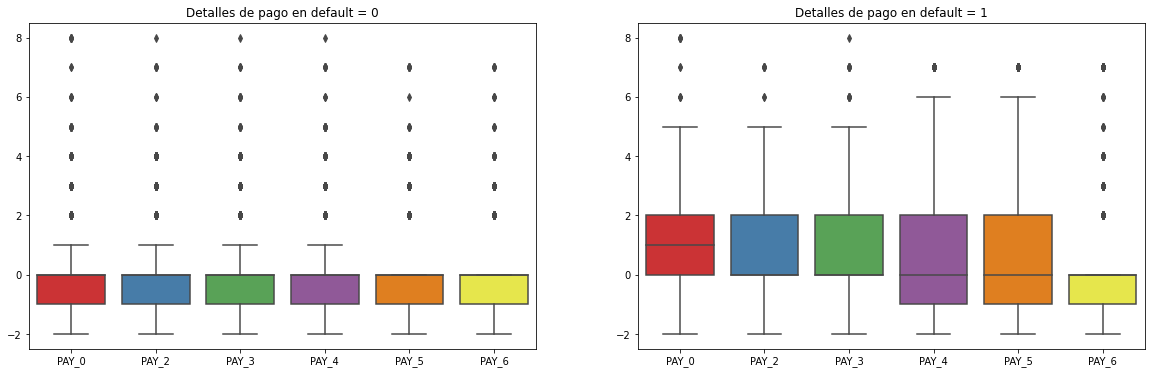

In [12]:
fig = plt.figure(figsize=(20, 6)) 
ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2) 
# Subplot 1
sns.boxplot(data=df0[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']], palette='Set1', ax =ax0)
ax0.set_title('Detalles de pago en default = 0')
# Subplot 2
sns.boxplot(data=df1[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']], palette='Set1',ax=ax1)
ax1.set_title ('Detalles de pago en default = 1')

plt.show()

For the payment details of the PAY_(0 to 6) columns a large difference can be seen, which can help the classification model. The average of the payment details when default = 0 is below 0, while when it falls in default = 1 it can be seen that the first payments of PAY_(6 to 4) has a distribution between less and greater than 0, and when they pass from PAY_(3 to 0) payments are above 0. 
Similarly, in the descriptive table of the dataframe df1 it can be seen that for the columns PAY_AMT, assuming that it corresponds to the payment amount, for 25% of the people who defaulted a value of 0 is shown.

## Methodology Selection of Variables


To confirm which variables are most related to the default decision, I will use the Analysis of Variance (ANOVA) method as mentioned above. With sklearn's f_classif I can do this. What I am looking for is to confirm which variables have a small p-value. The P-value tells me how statistically significant our value is. 

If the default variable is strongly correlated with the variables we are analyzing, ANOVA is expected to return a small p-value. For this case I will consider variables with p less than 0.035.

In [13]:
Xdata = data.drop('default', axis=1)
Ydata = data['default']

In [14]:
from sklearn.feature_selection import f_classif

In [15]:
sel=f_classif(Xdata, Ydata)
p_values = pd.Series(sel[1])
p_values.index = Xdata.columns
p_values.sort_values(ascending=True, inplace=True)

<AxesSubplot:>

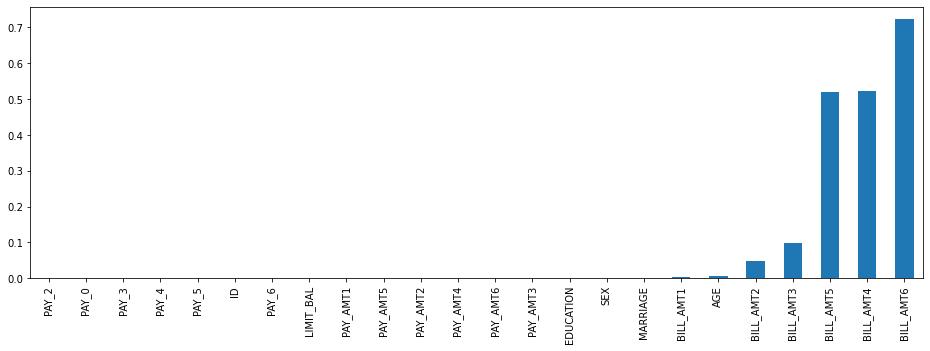

In [16]:
p_values.plot.bar(figsize=(16,5))

In [17]:
p_values=p_values[p_values<0.035]
p_values.index

Index(['PAY_2', 'PAY_0', 'PAY_3', 'PAY_4', 'PAY_5', 'ID', 'PAY_6', 'LIMIT_BAL',
       'PAY_AMT1', 'PAY_AMT5', 'PAY_AMT2', 'PAY_AMT4', 'PAY_AMT6', 'PAY_AMT3',
       'EDUCATION', 'SEX', 'MARRIAGE', 'BILL_AMT1', 'AGE'],
      dtype='object')

In fact, this confirms the strong correlation with the values of BILL_AMT(1-6). For this case the columns I will consider are those indicated in the variable p_values.index. BILL_AMT1 is important because it is the variable that will give us the estimation of the loss in money in case the client defaults.

In [18]:
p_values.drop(index='ID')
features = p_values.index

## Choice of modeling algorithm

Previously I described that a data imbalance can be observed with respect to the classification of defaults. However, I will analyze some models to see their responses to this data characteristic. First, I will define some necessary Sklearn libraries.

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
import time

#### Dividiendo el dataset en Train/Test 

In [20]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [21]:
X_1,x_2,y_1,y_2 = train_test_split(Xdata,Ydata,test_size=0.45,random_state=4,stratify = Ydata)
print ('set de train:', X_1.shape,  y_1.shape)
print ('set de test:', x_2.shape,  y_2.shape)

set de train: (15399, 24) (15399,)
set de test: (12600, 24) (12600,)


#### Definition of models

I will create a list of models to use, in this case I will try common binary classification models from sklearn: Logistic Regression, Decision Tree and Random Forest. Then I will define a function to see the most important metrics of each algorithm.

In [22]:
models = [LogisticRegression(C=0.01, solver='liblinear'),
          DecisionTreeClassifier(),
          RandomForestClassifier(n_estimators =100),
          ]

def run_models (xtrain,ytrain,xtest,ytest,X,Y,models,features):
    for model in models:
        t0 = time.time()
        if model ==LogisticRegression(C=0.01, solver='liblinear'):
            xtrain = preprocessing.StandardScaler().fit(xtrain).transform(xtrain)
            xtest = preprocessing.StandardScaler().fit(xtest).transform(xtest)
        model.fit(xtrain[features],ytrain)
        y_pred = model.predict(xtest[features])
        proba = model.predict_proba(xtest[features])
        roc_score = roc_auc_score(ytest, proba[:,1])
        cv_score = cross_val_score(model,X[features],Y,cv=5).mean()
        score = accuracy_score(ytest,y_pred)
        bin_clf_rep = classification_report(ytest,y_pred, zero_division=1)
        name = str(model)
        print(name[0:name.find("(")])
        print("Accuracy :", score)
        print("CV Score :", cv_score)
        print("AUC Score : ", roc_score)
        print(bin_clf_rep)
        print(confusion_matrix(ytest,y_pred,labels=[1,0]))
        print("Time Taken :", time.time()-t0, "seconds")
        print("------------------------------------------------------------")

#### Testing of algorithms

In [23]:
run_models(X_1,y_1,x_2,y_2,Xdata,Ydata,models,features)

LogisticRegression
Accuracy : 0.8343650793650793
CV Score : 0.8249209297578648
AUC Score :  0.6586674740576057
              precision    recall  f1-score   support

           0       0.83      1.00      0.91     10513
           1       1.00      0.00      0.00      2087

    accuracy                           0.83     12600
   macro avg       0.92      0.50      0.45     12600
weighted avg       0.86      0.83      0.76     12600

[[    0  2087]
 [    0 10513]]
Time Taken : 1.6080572605133057 seconds
------------------------------------------------------------
DecisionTreeClassifier
Accuracy : 0.7956349206349206
CV Score : 0.3317202689255735
AUC Score :  0.6463426917849355
              precision    recall  f1-score   support

           0       0.88      0.87      0.88     10513
           1       0.39      0.42      0.41      2087

    accuracy                           0.80     12600
   macro avg       0.64      0.65      0.64     12600
weighted avg       0.80      0.80      0.80

**As I described in the initial sections. It is a priority to achieve a stronger metric for the default = 1 predictions. In this case all three models show an F1-score for the positive 1's of less than 0.50. This may be due to the data being unbalanced. Therefore, none of the three models is efficient**.

## Methodology of evaluation

### Data balancing

Previously it was observed that the majority of the data corresponds to the default = 0 category. I will apply two types of balance (Undersampling and Oversampling) and analyze the behavior of both.

### Undersampling

In [24]:
from sklearn.utils import resample

In [25]:
# Decrease of the majority class
df_undersampling = resample(df0, 
                        replace=False,    
                        n_samples=4637,    
                        random_state=150) 
 
df_sub = pd.concat([df_undersampling, df1])
df_sub.default.value_counts()

1    4637
0    4637
Name: default, dtype: int64

With this method, I have reduced the amount of data by equalizing the number of defaults.

In [26]:
X_sub = df_sub.drop('default',axis=1)
Y_sub = df_sub['default']

In [27]:
#Splitting of undersampled data
X_1_sub,x_2_sub,y_1_sub,y_2_sub = train_test_split(X_sub,Y_sub,test_size=0.30,random_state=4,stratify = Y_sub)

#### Algorithm testing: undersampled data

In [28]:
run_models(X_1_sub,y_1_sub,x_2_sub,y_2_sub,X_sub,Y_sub,models,features)

LogisticRegression
Accuracy : 0.6855910887531441
CV Score : 0.6345786337982711
AUC Score :  0.7535754274192883
              precision    recall  f1-score   support

           0       0.70      0.64      0.67      1392
           1       0.67      0.73      0.70      1391

    accuracy                           0.69      2783
   macro avg       0.69      0.69      0.68      2783
weighted avg       0.69      0.69      0.68      2783

[[1016  375]
 [ 500  892]]
Time Taken : 0.41197824478149414 seconds
------------------------------------------------------------
DecisionTreeClassifier
Accuracy : 0.6730147323032698
CV Score : 0.404782549277878
AUC Score :  0.6730103002057561
              precision    recall  f1-score   support

           0       0.67      0.69      0.68      1392
           1       0.68      0.66      0.67      1391

    accuracy                           0.67      2783
   macro avg       0.67      0.67      0.67      2783
weighted avg       0.67      0.67      0.67    

We can see an improvement in the performance of the models. We see that the metrics increased considerably in case the default is equal to 1. The RandomForestClassifier was the one that presented the best results. However, the disadvantage of undersampling is that we are leaving a lot of data out of the model training.

### Oversampling

For oversampling I will use the SMOTE (Synthetic Minority Oversampling TEchnique) method from the imblearn python library. This will help me to create synthetic samples.

In [29]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

In [30]:
smote = SMOTE(sampling_strategy='minority')
X_sm,y_sm = smote.fit_sample(Xdata,Ydata)

In [31]:
y_sm.value_counts()

1    23362
0    23362
Name: default, dtype: int64

Now the data frame contains the same amount of default data in both cases

In [32]:
#Splitting de datos oversampled
X_1_ov,x_2_ov,y_1_ov,y_2_ov = train_test_split(X_sm,y_sm,test_size=0.45,random_state=4,stratify = y_sm)

#### Algorithm Testing: Oversampled Data

In [33]:
run_models(X_1_ov,y_1_ov,x_2_ov,y_2_ov,X_sm,y_sm,models,features)

LogisticRegression
Accuracy : 0.6714543898031009
CV Score : 0.6448461057117938
AUC Score :  0.7110250068924462
              precision    recall  f1-score   support

           0       0.71      0.59      0.64     10513
           1       0.65      0.75      0.70     10513

    accuracy                           0.67     21026
   macro avg       0.68      0.67      0.67     21026
weighted avg       0.68      0.67      0.67     21026

[[7931 2582]
 [4326 6187]]
Time Taken : 2.0450801849365234 seconds
------------------------------------------------------------
DecisionTreeClassifier
Accuracy : 0.8001997526871493
CV Score : 0.5390359355416786
AUC Score :  0.8001997526871493
              precision    recall  f1-score   support

           0       0.81      0.79      0.80     10513
           1       0.79      0.82      0.80     10513

    accuracy                           0.80     21026
   macro avg       0.80      0.80      0.80     21026
weighted avg       0.80      0.80      0.80    

**Conclusion: Apparently, the model that had the best results was RandomForest, and even improved after oversampling. One of the favorable metrics is the AUC. When AUC is 0.93 it means that there is a 90% probability that the model can distinguish between positive default and zero default. In addition, it has a balanced F1 score, giving weight also to the default which I consider important which is rank one. RandomForest itself is a very efficient ensemble learning method.**

## Model Selected - Conclusion

### RandomForest: Model Selected

In [49]:
RF= RandomForestClassifier(n_estimators =100).fit(X_1_ov[features],y_1_ov)

In [35]:
def predict_test (model, #enter selected RF model
                  testdata, #enter data to be checked
                  features #selected featured
                 ):
    xtest = testdata.drop('default',axis=1)
    ytest = testdata['default']
    t0 = time.time()
    y_pred = model.predict(xtest[features])
    proba = model.predict_proba(xtest[features])
    roc_score = roc_auc_score(ytest, proba[:,1])
    score = accuracy_score(ytest,y_pred)
    bin_clf_rep = classification_report(ytest,y_pred, zero_division=1)
    name = str(model)
    print(name[0:name.find("(")])
    print("Accuracy :", score)
    print("AUC Score : ", roc_score)
    print(bin_clf_rep)
    print(confusion_matrix(ytest,y_pred,labels=[1,0]))
    print("Time Taken :", time.time()-t0, "seconds")
    print("------------------------------------------------------------")
    proba1 = proba[:,1]
    return xtest, y_pred, proba1 #retorna los datos probados, las predicciones de default y la probabilidad

**I defined a function for the selected model. In case you want to test the "validation_dataset" directly. You can enter the dataframe directly as long as it keeps the same characteristics as the default dataset. The function returns an array for the predictions and another one for the probabilities that can be stored in variables**.

I proceeded to do an exercise using as a test the total data without balances. That is, the original default set.

In [50]:
xtest, y_pred, proba = predict_test(RF,data,features)

RandomForestClassifier
Accuracy : 0.9274616950605379
AUC Score :  0.9643380044422579
              precision    recall  f1-score   support

           0       0.97      0.94      0.96     23362
           1       0.75      0.85      0.79      4637

    accuracy                           0.93     27999
   macro avg       0.86      0.90      0.88     27999
weighted avg       0.93      0.93      0.93     27999

[[ 3933   704]
 [ 1327 22035]]
Time Taken : 0.8656861782073975 seconds
------------------------------------------------------------


You can see that the model is very assertive. I tried to do a parameter optimization using GridSearch. However the process took more than two hours and the result was not so different.

#### The variable saved as proba is the Probability of Non-Payment of a customer.

In [51]:
proba

array([0.72, 0.59, 0.83, ..., 0.16, 0.18, 0.06])